In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/framingham.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/kaggle/input/dataset/framingham.csv')

In [15]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [16]:
df.isnull().sum()
#we have to fill all the null values since deleting them are not practical as dataset is small

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [17]:
import numpy as np
from scipy.stats import pointbiserialr #we use pointbiserialr for comparing a continous and discrete(categorical) data


df2 = df.dropna(subset=['cigsPerDay'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['cigsPerDay'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.06
P-value: 0.000


In [18]:
df2 = df.dropna(subset=['sysBP'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['sysBP'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.22
P-value: 0.000


In [19]:
df2 = df.dropna(subset=['totChol'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['totChol'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.08
P-value: 0.000


In [20]:
df2 = df.dropna(subset=['diaBP'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['diaBP'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.15
P-value: 0.000


In [21]:
df2 = df.dropna(subset=['BMI'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['BMI'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.08
P-value: 0.000


In [22]:
df2 = df.dropna(subset=['heartRate'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['heartRate'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.02
P-value: 0.136


In [23]:
df2 = df.dropna(subset=['glucose'])
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['glucose'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.13
P-value: 0.000


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency



chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['education'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 31.90007874607683
P-value: 5.493472248503772e-07


In [25]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['male'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 32.64296047074444
P-value: 1.1073976912877559e-08


In [26]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['currentSmoker'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 1.497705652757576
P-value: 0.2210247224594497


In [27]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['BPMeds'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 30.60917875688301
P-value: 3.1559716845510175e-08


In [28]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['prevalentStroke'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 14.020762729079046
P-value: 0.00018080313034275284


In [29]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['prevalentHyp'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 132.61099703660688
P-value: 1.0998229381834027e-30


In [30]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['diabetes'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 38.44172261466515
P-value: 5.641334407100521e-10


In [31]:
#pvalue of heart rate and current smoker is greater than 0.05 hence they are not significant. Therfore we have to remove them
df.drop('currentSmoker',axis=1,inplace=True)
df.drop('heartRate',axis=1,inplace=True)

In [32]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


<Axes: xlabel='age'>

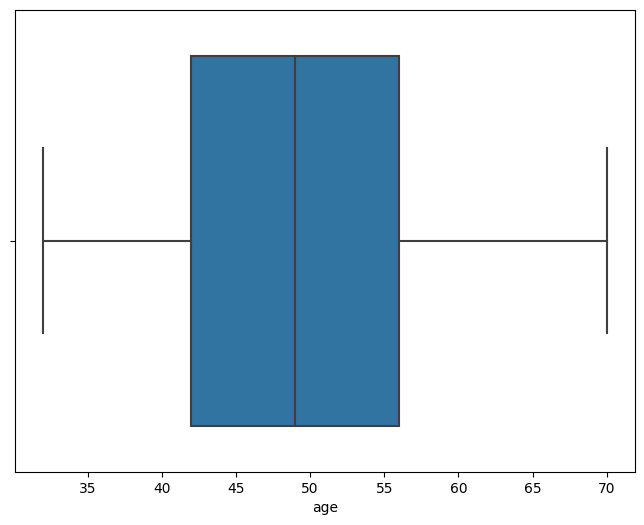

In [33]:
#now we have to deal with the outliers,since removing outliers may lead to loss of much data we have to cap teh outliers to the nearest extreme point
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['age'])


<Axes: xlabel='cigsPerDay'>

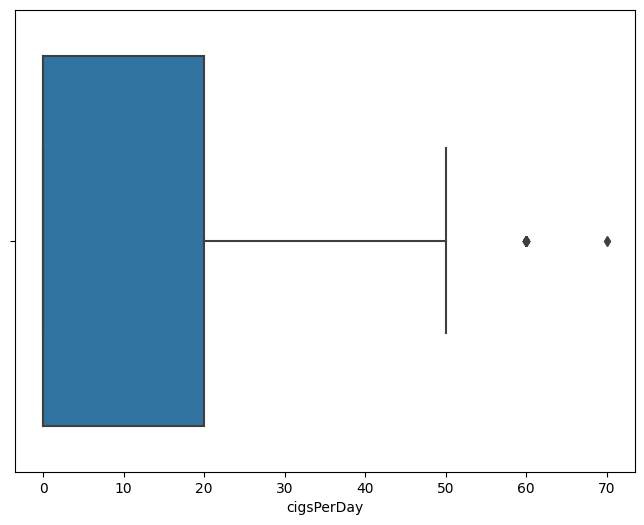

In [34]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['cigsPerDay'])

<Axes: xlabel='totChol'>

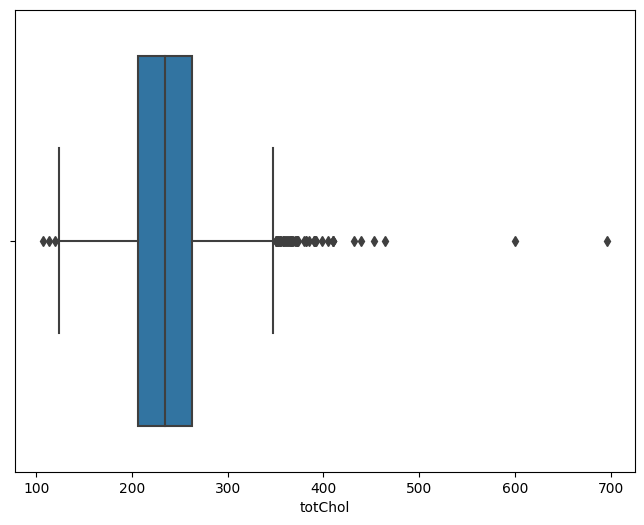

In [35]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['totChol'])

<Axes: xlabel='sysBP'>

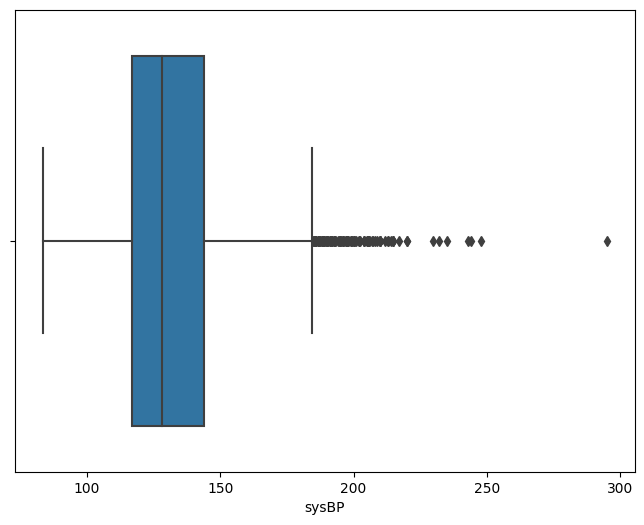

In [36]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['sysBP'])

<Axes: xlabel='diaBP'>

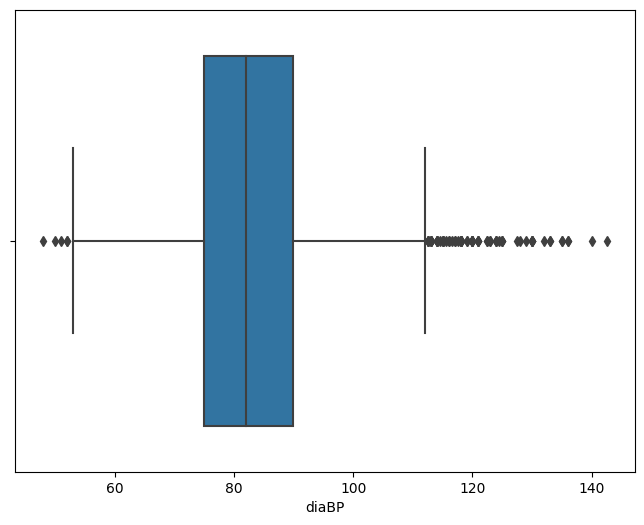

In [37]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['diaBP'])

<Axes: xlabel='BMI'>

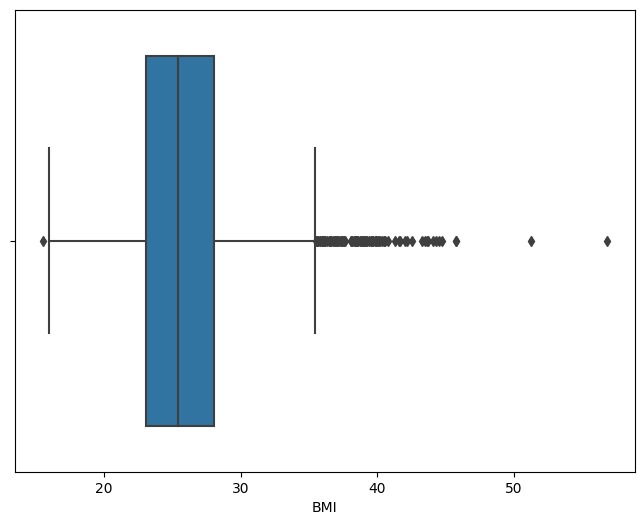

In [38]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['BMI'])

<Axes: xlabel='glucose'>

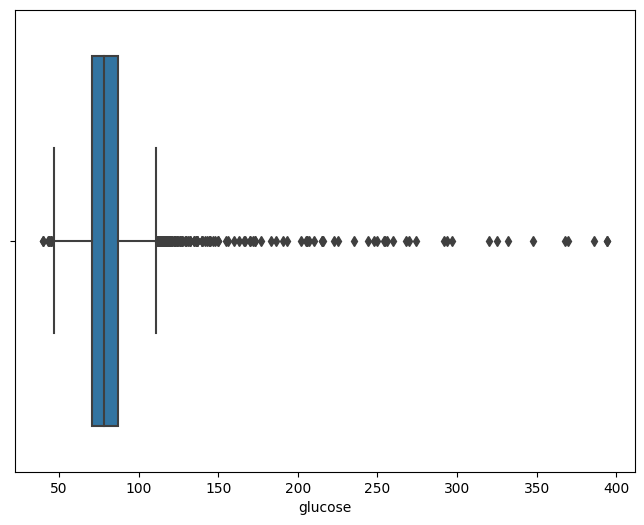

In [39]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['glucose'])

In [40]:
Q1 = df['cigsPerDay'].quantile(0.25)
Q3 = df['cigsPerDay'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['cigsPerDay'] = df['cigsPerDay'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))




In [41]:
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['totChol'] = df['totChol'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))



In [42]:
Q1 = df['sysBP'].quantile(0.25)
Q3 = df['sysBP'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['sysBP'] = df['sysBP'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


In [43]:
Q1 = df['diaBP'].quantile(0.25)
Q3 = df['diaBP'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['diaBP'] = df['diaBP'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))



In [44]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['BMI'] = df['BMI'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))



In [45]:
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# Cap the outliers
df['glucose'] = df['glucose'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

<Axes: xlabel='glucose'>

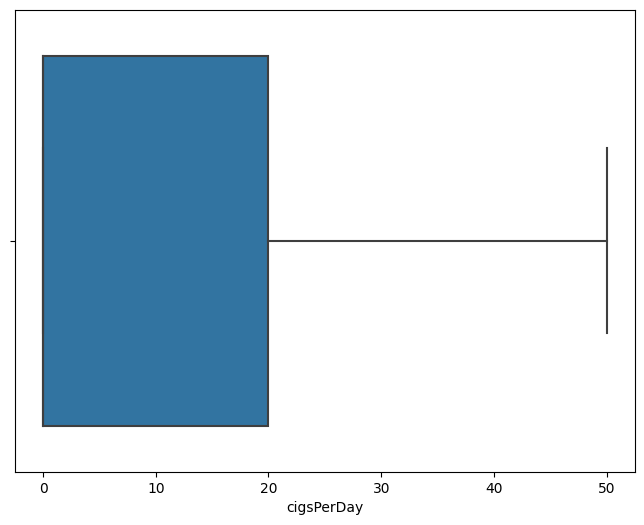

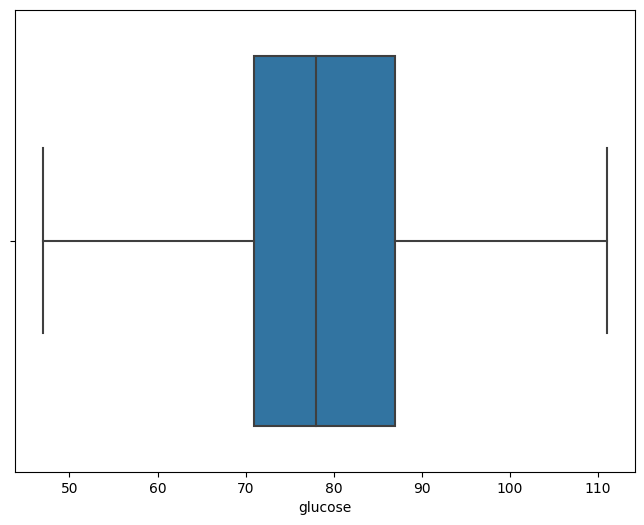

In [46]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['cigsPerDay'])


plt.figure(figsize=(8, 6))

sns.boxplot(x=df['glucose'])


In [48]:
#we have successfully capped all the outliers

In [49]:
df.isnull().sum()
#we have to deal with the null value now,null values are filled with the mean(for numerical) and mode (for categorical) of the values with respect to its TenYearCHD category

male                 0
age                  0
education          105
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [51]:
mode_chd_1 = df[df['TenYearCHD'] == 1]['BPMeds'].mode()[0]

# Step 2: Calculate the mode of "education" for TenYearCHD == 0
mode_chd_0 = df[df['TenYearCHD'] == 0]['BPMeds'].mode()[0]

# Step 3: Fill null values based on the value of "TenYearCHD"
df['BPMeds'] = df.apply(
    lambda row: mode_chd_1 if pd.isnull(row['BPMeds']) and row['TenYearCHD'] == 1 
                else mode_chd_0 if pd.isnull(row['BPMeds']) and row['TenYearCHD'] == 0 
                else row['BPMeds'],
    axis=1
)
#now repeat the same for all categorical variables with null values

In [52]:
mode_chd_1 = df[df['TenYearCHD'] == 1]['education'].mode()[0]

# Step 2: Calculate the mode of "education" for TenYearCHD == 0
mode_chd_0 = df[df['TenYearCHD'] == 0]['education'].mode()[0]

# Step 3: Fill null values based on the value of "TenYearCHD"
df['education'] = df.apply(
    lambda row: mode_chd_1 if pd.isnull(row['education']) and row['TenYearCHD'] == 1 
                else mode_chd_0 if pd.isnull(row['education']) and row['TenYearCHD'] == 0 
                else row['education'],
    axis=1
)

In [53]:
# Calculate the mode for ages based on TenYearCHD
mean_attribute_chd_1 = df[df['TenYearCHD'] == 1]['glucose'].mean() # mean of attribute where TenYearCHD == 1
mean_attribute_chd_0 = df[df['TenYearCHD'] == 0]['glucose'].mean() # mean of attribute where TenYearCHD == 0

# Define a function to fill missing attribute based on TenYearCHD
def fill_attribute(row):
    if pd.isnull(row['glucose']):
        if row['TenYearCHD'] == 1:
            return mean_attribute_chd_1  # Fill with mean where TenYearCHD == 1
        else:
            return mean_attribute_chd_0  # Fill with mean where TenYearCHD == 0
    return row['glucose']

# Apply the function to fill missing attributes
df['glucose'] = df.apply(fill_attribute, axis=1)

In [54]:
# Calculate the mean for attributes based on TenYearCHD
mean_attribute_chd_1 = df[df['TenYearCHD'] == 1]['BMI'].mean() # mean of attribute where TenYearCHD == 1
mean_attribute_chd_0 = df[df['TenYearCHD'] == 0]['BMI'].mean() # mean of attribute where TenYearCHD == 0

# Define a function to fill missing attribute based on TenYearCHD
def fill_attribute(row):
    if pd.isnull(row['BMI']):
        if row['TenYearCHD'] == 1:
            return mean_attribute_chd_1  # Fill with mean where TenYearCHD == 1
        else:
            return mean_attribute_chd_0  # Fill with mean where TenYearCHD == 0
    return row['BMI']

# Apply the function to fill missing attributes
df['BMI'] = df.apply(fill_attribute, axis=1)

In [55]:
# Calculate the mean for attributes based on TenYearCHD
mean_attribute_chd_1 = df[df['TenYearCHD'] == 1]['totChol'].mean() # mean of attribute where TenYearCHD == 1
mean_attribute_chd_0 = df[df['TenYearCHD'] == 0]['totChol'].mean() # mean of attribute where TenYearCHD == 0

# Define a function to fill missing attribute based on TenYearCHD
def fill_attribute(row):
    if pd.isnull(row['totChol']):
        if row['TenYearCHD'] == 1:
            return mean_attribute_chd_1  # Fill with mean where TenYearCHD == 1
        else:
            return mean_attribute_chd_0  # Fill with mean where TenYearCHD == 0
    return row['totChol']

# Apply the function to fill missing attributes
df['totChol'] = df.apply(fill_attribute, axis=1)

In [56]:
# Calculate the mean for attributes based on TenYearCHD
mean_attribute_chd_1 = df[df['TenYearCHD'] == 1]['cigsPerDay'].mean() # mean of attribute where TenYearCHD == 1
mean_attribute_chd_0 = df[df['TenYearCHD'] == 0]['cigsPerDay'].mean() # mean of attribute where TenYearCHD == 0

# Define a function to fill missing attribute based on TenYearCHD
def fill_attribute(row):
    if pd.isnull(row['cigsPerDay']):
        if row['TenYearCHD'] == 1:
            return mean_attribute_chd_1  # Fill with mean where TenYearCHD == 1
        else:
            return mean_attribute_chd_0  # Fill with mean where TenYearCHD == 0
    return row['cigsPerDay']

# Apply the function to fill missing attributes
df['cigsPerDay'] = df.apply(fill_attribute, axis=1)

In [66]:
#checking for null values
df.isnull().sum()
#we have successfully removed null values
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,-1.294113,4.0,-0.947546,0.0,0,0,0,-0.976723,-1.462512,-1.153442,0.402818,77.0,0
1,0,-0.351728,2.0,-0.947546,0.0,0,0,0,0.381481,-0.442829,-0.082826,0.831950,76.0,0
2,1,-0.106949,1.0,1.147064,0.0,0,0,0,0.267341,-0.075336,-0.173655,-0.022479,70.0,0
3,0,1.285028,3.0,1.324268,0.0,0,1,0,-0.206478,0.951057,1.077912,0.796499,103.0,1
4,0,-0.351728,3.0,1.209610,0.0,0,0,0,1.138240,0.056236,0.182766,-0.657617,85.0,0


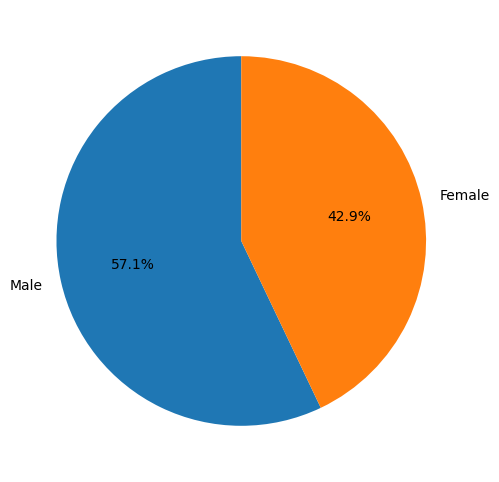

In [67]:
# Assuming df is your dataframe
gender_counts = df['male'].value_counts()

# Create labels for the chart
labels = ['Male', 'Female']  # Adjust the labels based on your data

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


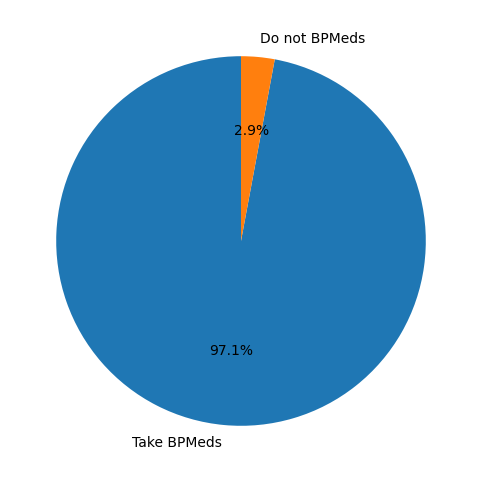

In [59]:


# Assuming df is your dataframe
gender_counts = df['BPMeds'].value_counts()

# Create labels for the chart
labels = ['Take BPMeds', 'Do not BPMeds']  # Adjust the labels based on your data

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


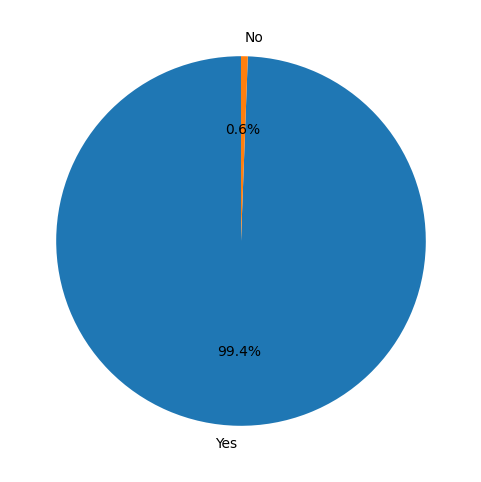

In [60]:

# Assuming df is your dataframe
gender_counts = df['prevalentStroke'].value_counts()

# Create labels for the chart
labels = ['Yes', 'No']  # Adjust the labels based on your data

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


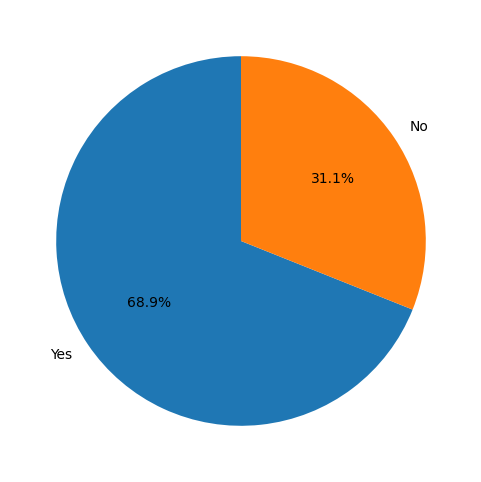

In [61]:
# Assuming df is your dataframe
gender_counts = df['prevalentHyp'].value_counts()

# Create labels for the chart
labels = ['Yes', 'No']  # Adjust the labels based on your data

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


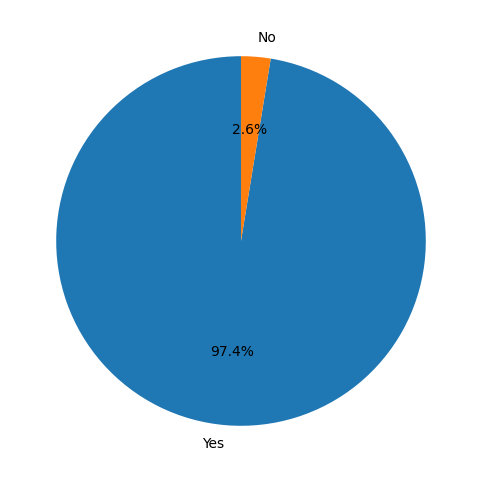

In [62]:

# Assuming df is your dataframe
gender_counts = df['diabetes'].value_counts()

# Create labels for the chart
labels = ['Yes', 'No']  # Adjust the labels based on your data

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


In [68]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['age'] = pt.fit_transform(df[['age']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['cigsPerDay'] = pt.fit_transform(df[['cigsPerDay']])



# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['totChol'] = pt.fit_transform(df[['totChol']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['sysBP'] = pt.fit_transform(df[['sysBP']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['diaBP'] = pt.fit_transform(df[['diaBP']])

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['BMI'] = pt.fit_transform(df[['BMI']])





# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['glucose'] = pt.fit_transform(df[['glucose']])




In [69]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,-1.294341,4.0,-0.959142,0.0,0,0,0,-0.976711,-1.474285,-1.154576,0.404327,-0.152172,0
1,0,-0.351441,2.0,-0.959142,0.0,0,0,0,0.381280,-0.435241,-0.080175,0.832358,-0.239980,0
2,1,-0.106616,1.0,1.132895,0.0,0,0,0,0.267118,-0.065334,-0.171088,-0.020584,-0.799603,0
3,0,1.284806,3.0,1.264758,0.0,0,1,0,-0.206710,0.951256,1.077235,0.797020,1.722908,1
4,0,-0.351441,3.0,1.179894,0.0,0,0,0,1.138333,0.066284,0.185323,-0.656694,0.501763,0


In [70]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['age'])
print(f"Skewness: {skewness}")

Skewness: -0.0038839028361827275


In [71]:
# Count total duplicates
total_duplicates = df.duplicated().sum()
print(f"Total duplicates: {total_duplicates}")


Total duplicates: 0


In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,  # Confusion matrix
    classification_report  # Classification report
)

import matplotlib.pyplot as plt


In [73]:
X = df[['male', 'age','education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','glucose']]  # Features
y = df['TenYearCHD'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = [{
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['lbfgs','newton-cg','liblinear','sag', 'saga'],  # Algorithm to use for optimization
    'penalty': ['l1', 'l2','elasticnet'],  # Regularization type
    'max_iter':[100,1000,2500,5000]
}]

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [77]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[720   4]
 [118   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.05      0.09       124

    accuracy                           0.86       848
   macro avg       0.73      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848

0.8561320754716981
Accuracy: 0.8561
Precision: 0.6000
Recall: 0.0484
F1 Score: 0.0896
ROC AUC Score: 0.7173


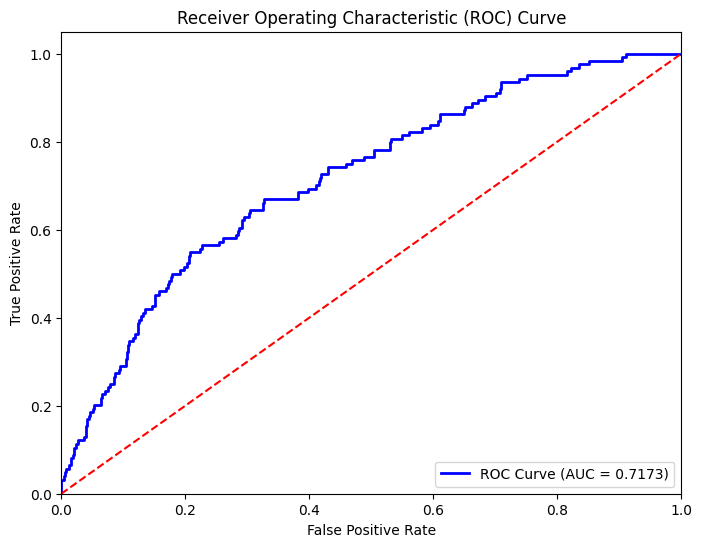

In [75]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()